In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MyDataSets/Cgpa_iq.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


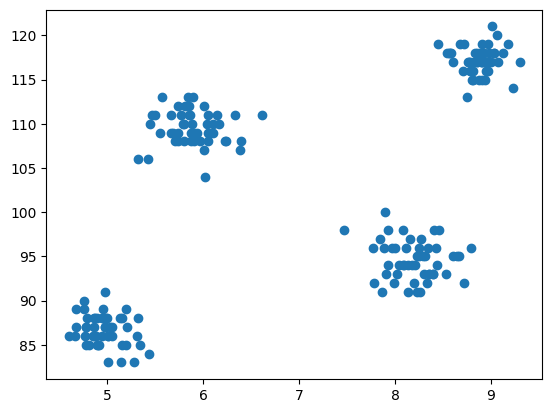

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans

The wcss (Within-Cluster-Sum-of-Squares) list will contain WCSS values for different values of k. Typically, you would use these WCSS values to determine the optimal number of clusters (k) for your data.

You can visualize the WCSS values and look for an "elbow point" in the plot, which can help you choose the appropriate number of clusters for your K-Means model.

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 395.9605877691831,
 295.43918959431915,
 233.54082485509014,
 204.33441047547043,
 171.56716356743664]

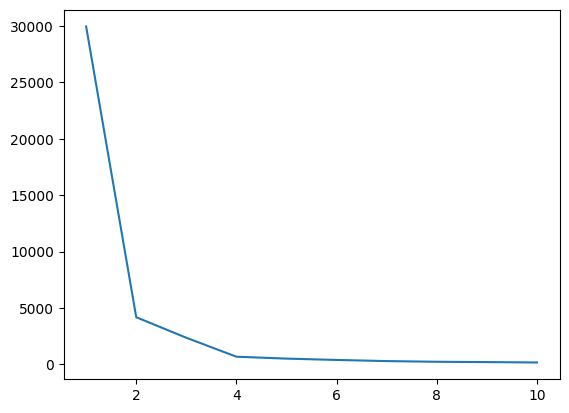

In [ ]:
plt.plot(range(1,11),wcss) #visualize the WCSS values and look for an "elbow point" in the plot

In [ ]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
#The resulting y_means is an array of cluster labels,
#where each element corresponds to the cluster assignment for a data point in X.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([2, 0, 1, 1, 0, 0, 1, 3, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 3, 1, 0, 3, 0, 3, 0, 1, 1, 3, 0, 2, 0, 2, 1, 1, 2,
       3, 3, 1, 0, 3, 0, 2, 2, 3, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 3, 2, 3,
       1, 2, 0, 1, 0, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1, 3, 0, 2, 3, 2, 3, 0,
       3, 0, 3, 3, 1, 2, 1, 1, 3, 1, 2, 3, 0, 2, 2, 3, 2, 2, 1, 2, 3, 3,
       1, 3, 0, 0, 1, 3, 1, 0, 3, 2, 2, 0, 1, 3, 1, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 0, 3, 0, 2, 1, 1, 1, 2, 0, 2, 2, 3, 2, 3, 0, 2, 3, 2, 3, 3,
       2, 1, 0, 3, 0, 1, 2, 3, 0, 1, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 1,
       3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0,
       0, 3], dtype=int32)

In [ ]:
X[y_means == 3,1]
#the expression X[y_means == 3, 1] will give you an array containing the values of the second feature (column) of all data points that belong to cluster 3.
#This can be useful for analyzing or visualizing the distribution of that particular feature within the cluster.

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

The first statement creates a scatter plot for data points in cluster 0. It selects data points belonging to cluster 0 by using the boolean condition y_means == 0.

It then plots the first feature (column 0) on the x-axis and the second feature (column 1) on the y-axis, assigning them the color blue.


The subsequent lines perform similar actions for clusters 1, 2, and 3:

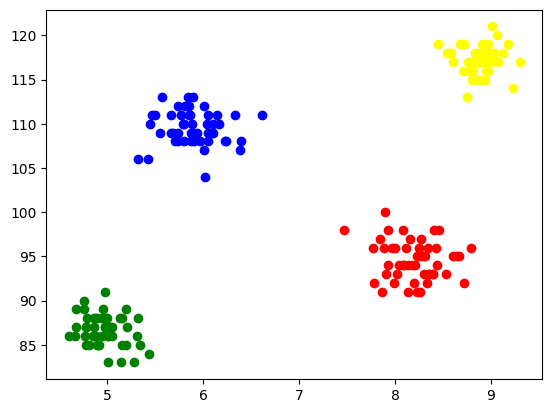

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

**K-Means on 3-D Data**

In [ ]:
from sklearn.datasets import make_blobs

# Define the centroids (centers) for the clusters
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]

# Define the standard deviation for each cluster
cluster_std = [1, 1, 1, 1]

# Generate synthetic data with specified parameters
X, y = make_blobs(
    n_samples=200,          # Total number of data points
    cluster_std=cluster_std, # Standard deviation for each cluster
    centers=centroids,      # Cluster centers
    n_features=3,           # Number of features (dimensions) for each data point
    random_state=1          # Random seed for reproducibility
)


In [ ]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

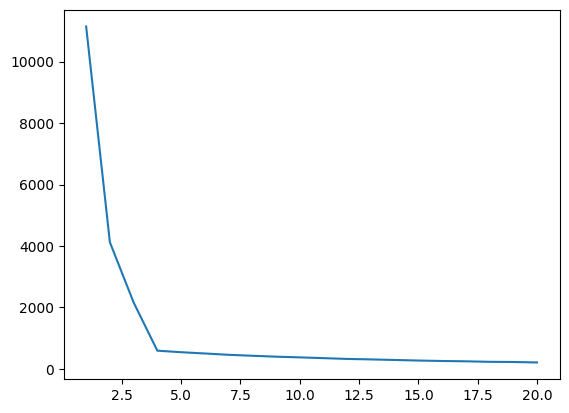

In [ ]:
plt.plot(range(1,21),wcss)

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()